In [1]:
%matplotlib notebook
import pandas as pd
from graph_tool import load_graph
from glob import glob
import pickle as pkl
from evaluate import evaluate_performance

In [2]:
dataset = 'grid-64'
g = load_graph('data/{}/graph.gt'.format(dataset))
rows = []
for p in glob('outputs/paper_experiment/{}/si/mst/qs/1.0/*.pkl'.format(dataset)):
    infection_times, source, obs_nodes, true_edges, pred_edges = pkl.load(open(p, 'rb'))
    scores = evaluate_performance(g, None, source, pred_edges, obs_nodes,
                                  infection_times, true_edges,
                                  convert_to_directed=False)
    if scores[5] < 0.5:
        print(scores[5])
        break
    rows.append(scores)
df = pd.DataFrame(rows, columns=['n.prec', 'n.rec',
                                 'obj',
                                 'e.prec', 'e.rec',
                                 'rank-corr',
                                 'order accuracy'])    

0.464137734771


In [3]:
from utils import edges2graph
from evaluate import infer_infection_time_from_tree

true_nodes = {i for e in true_edges for i in e}
pred_nodes = {i for e in pred_edges for i in e}
common_nodes = true_nodes.intersection(pred_nodes)
nodes = list(common_nodes)
pred_tree = edges2graph(g, pred_edges)
true_tree = edges2graph(g, true_edges)
root = next(v
            for v in pred_tree.vertices()
            if v.in_degree() == 0 and v.out_degree() > 0)
pred_times = infer_infection_time_from_tree(pred_tree, root)
print(pred_times[nodes])
print(infection_times[nodes])


[6 5 4 4 3 4 5 2 1 2 3 4 3 0 1 2 3 4 1 2 3 4 5 6 3 2 3 4 5 6 7 4 6 7]
[ 24.  16.  15.  23.  12.  18.  24.  24.   3.   9.  15.  23.  24.   0.   5.
  12.  14.  22.  12.   9.  18.  16.  17.  23.  24.  23.  18.  20.  19.  20.
  23.  20.  23.  22.]


In [4]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

gnx = nx.read_graphml('data/{}/2-6/graph.graphml'.format('grid'))
gnx = nx.relabel_nodes(gnx, {i: int(i) for i in gnx.nodes_iter()})
pos = graphviz_layout(gnx, root=0)


In [9]:
infection_times[[27, 28]]

array([  5.,  12.])

<IPython.core.display.Javascript object>


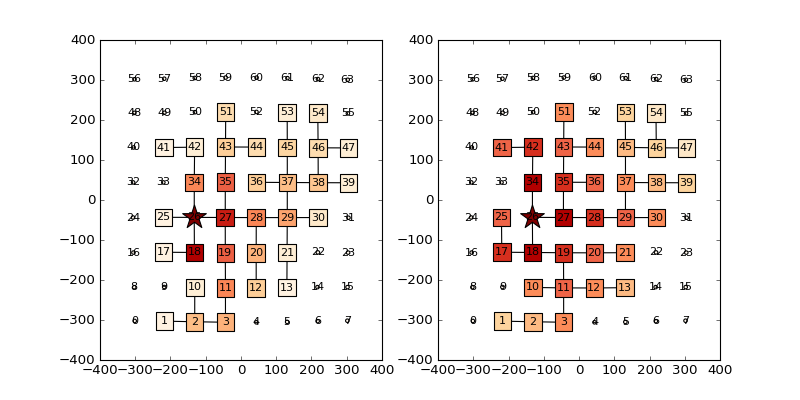

In [6]:
from matplotlib import pyplot as plt
from plot_utils import plot_snapshot
from utils import extract_edges

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source, with_labels=True,
              ax=ax[0],
              edges=true_edges)

plot_snapshot(gnx, pos, pred_times, queried_nodes=obs_nodes, source_node=root, with_labels=True,
              ax=ax[1],
              edges=pred_edges)